# 👥 Fase 04: Customer & Geospatial Analysis
---
**Proyecto:** Olist E-commerce (Brasil)  
**Objetivo:** Analizar la distribución geográfica de los clientes y su comportamiento de compra para identificar mercados clave.

## 1. Configuración y Carga de Datos
* Carga de `customers_cleaned.csv` y `orders_cleaned.csv`.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

# Configuración visual
sns.set_theme(style="whitegrid")

# Carga de datos procesados
customers = pd.read_csv('../data/processed/customers_cleaned.csv')
orders = pd.read_csv('../data/processed/orders_cleaned.csv')
items = pd.read_csv('../data/processed/items_cleaned.csv')

print(f"Dataset de clientes: {customers.shape[0]} registros.")

Dataset de clientes: 99441 registros.


In [4]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,delta_estimated_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-18.0


In [5]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [32]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


## 2. Distribución Geográfica de Clientes
* Voy a ver en qué estados de Brasil tenemos más clientes.

In [7]:
# Contamos clientes por estado
state_distribution =  customers['customer_state'].value_counts().reset_index()
state_distribution.columns = ['state', 'customer_count']
state_distribution.head()

,state,customer_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


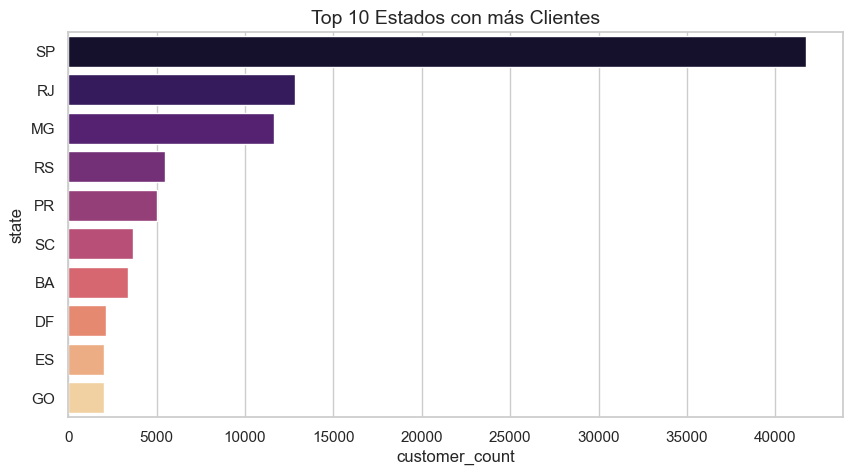

In [8]:
# Visualización rápida
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=state_distribution.head(10), 
    x='customer_count', 
    y='state', 
    hue='state',
    palette='magma',
    legend=False
)
plt.title('Top 10 Estados con más Clientes', fontsize=14)
plt.show()

In [9]:
# Calcúlo el porcentaje de clientes por estado
state_distribution['percentage'] = (
    state_distribution['customer_count']/state_distribution['customer_count'].sum() * 100
).round(2)
state_distribution.head()                                   

,state,customer_count,percentage
0,SP,41746,41.98
1,RJ,12852,12.92
2,MG,11635,11.70
3,RS,5466,5.50
4,PR,5045,5.07


## 3. Comportamiento de Compra: Análisis de Fidelidad (SQL)
* **KPI:** Tasa de Recurrencia.
* **Concepto Técnico:** Agregamos pedidos por `customer_unique_id` para identificar cuántos clientes regresan a la plataforma.

In [11]:
import duckdb

In [12]:
q = """
SELECT customer_unique_id,
    COUNT(order_id) AS order_quantity
FROM orders AS o 
JOIN customers AS c
ON o.customer_id = c.customer_id
GROUP BY customer_unique_id;
"""

In [13]:
query = duckdb.query(q).df()
display(query)

,customer_unique_id,order_quantity
0,bd13608b9c6033892ce62269b50a0afc,1
1,394b2ce444baae9ae609f5d32000de0f,1
2,12e7a2c201751ddc979e7a45cef500f3,1
3,bf0303939d54b8df5da4762bbaab1955,1
4,2ae3c67452283d5a0d30b32e0d33296e,2
...,...,...
96091,43fb4e33ebe4ac765e99c7b57e5d6940,1
96092,b0428b000a682156b8856ede42ffa1f1,1
96093,2fbed526955cf9cfa88dfc3a1c73463e,1
96094,d0cca06294eeb5485945d73603e8b949,1


In [14]:
query_fidelity = """
WITH OrdersPerCustomer AS (
SELECT customer_unique_id,
    COUNT(order_id) as amount_orders
FROM orders AS o
JOIN customers AS c
ON o.customer_id = c.customer_id
GROUP BY customer_unique_id
) 
SELECT amount_orders,
       COUNT(*) AS total_customers,
       ROUND(COUNT(*) * 100 / (SELECT COUNT(*) FROM OrdersPerCustomer),2) AS percentaje,
FROM OrdersPerCustomer
GROUP BY 1
ORDER BY percentaje DESC;
"""

In [15]:
fidelity = duckdb.query(query_fidelity).df()
fidelity

,amount_orders,total_customers,percentaje
0,1,93099,96.88
1,2,2745,2.86
2,3,203,0.21
3,4,30,0.03
4,6,6,0.01
5,5,8,0.01
6,7,3,0.00
7,17,1,0.00
8,9,1,0.00


#### 📝 Conclusión Técnica (Sección 3)
Insight: Olist es una plataforma de "adquisición pura", no de "retención". El 96.88% de los clientes ha realizado solo una compra. Existe una oportunidad crítica de crecimiento en estrategias de CRM y fidelización, ya que menos del 4% de la base de usuarios regresa. El cliente "VIP" máximo en este dataset realizó 17 pedidos.

## 4. Análisis de Valor: Clientes Únicos vs. Recurrentes
* **Objetivo:** Comparar si los clientes recurrentes tienen un ticket promedio más alto que los clientes de una sola compra.
* **Técnica:** Creación de una bandera (flag) de segmentación mediante SQL.

##### 🧩 Celda 1 — Construimos la métrica base (CTE) con comentarios
*Objetivo*: Crear una tabla temporal con el gasto total y la cantidad de pedidos por persona real (customer_unique_id).
Así luego definimos la bandera (Recurrente vs Único).

In [36]:
# Métrica base por cliente real (CustomerMetrics)
# - Uso customer_unique_id para medir recurrencia REAL (una persona puede tener varios customer_id).
# - Cuento pedidos desde la tabla `orders` (JOIN por customer_id).
# - Sumo el price de `items` como gasto total (sin flete).
# - Este CTE será la base para segmentar clientes en Recurrente vs Único.
query_customer_metrics = """
WITH CustomerMetrics AS (
    SELECT
        c.customer_unique_id,
        COUNT(o.order_id) AS total_orders,
        SUM(i.price) AS total_price
    FROM customers AS c
    JOIN orders AS o
        ON c.customer_id = o.customer_id
    JOIN items AS i
        ON o.order_id = i.order_id
    GROUP BY 1
)
SELECT * FROM CustomerMetrics
LIMIT 10;
"""
duckdb.query(query_customer_metrics).show()

┌──────────────────────────────────┬──────────────┬─────────────┐
│        customer_unique_id        │ total_orders │ total_price │
│             varchar              │    int64     │   double    │
├──────────────────────────────────┼──────────────┼─────────────┤
│ 998137918d30f89547129f9f991f98e8 │            2 │        92.0 │
│ bf448042b40749d8b95fe00c08a9b5cb │            2 │       288.9 │
│ 72b1f9e1b8aa00c0be1d47006c3ab5f7 │            1 │       151.9 │
│ b60b56a62765809c220077046e86475a │            1 │       249.9 │
│ d3133cefb29933308fe133a43dc60081 │            1 │        62.8 │
│ 1e2ce8e4f49582730eb003ac5f1712d0 │            1 │       24.99 │
│ a1f23e4dde67cf0cf575e23622008ab1 │            1 │       129.9 │
│ 867bd5d847441c4437493b52f60cca6f │            1 │       129.0 │
│ 29b7d8f64474dff675987e6ef0432a44 │            1 │        54.9 │
│ cf7d702830a3cf5bfaffc9979fbf5ec1 │            1 │       249.9 │
├──────────────────────────────────┴──────────────┴─────────────┤
│ 10 rows 

##### 🧩 Celda 2 — Consulta completa (segmentación + agregados)
*Objetivo*: Con la métrica base, definimos la bandera de segmento y comparamos:
+ clientes por segmento
+ ticket promedio por cliente (promedio de total_spent)
+ revenue total del segmento

In [41]:
query_value_segment = """
WITH CustomerMetrics AS (
    SELECT
        c.customer_unique_id,
        COUNT(o.order_id) AS total_orders,
        SUM(i.price) AS total_spent
    FROM customers AS c
    JOIN orders AS o
        ON c.customer_id = o.customer_id
    JOIN items AS i
        ON o.order_id = i.order_id
    GROUP BY 1
),
Segments AS (
    SELECT
        customer_unique_id,
        total_orders,
        total_spent,
        CASE
            WHEN total_orders > 1 THEN 'Recurrente' 
            ELSE 'Unico'
        END AS customer_type
    FROM CustomerMetrics
)
SELECT
    customer_type,
    COUNT(*) AS num_customers,
    ROUND(AVG(total_spent), 2) AS avg_ticket_per_customer,
    ROUND(SUM(total_spent), 2) AS total_revenue
FROM Segments
GROUP BY 1
ORDER BY customer_type DESC;
"""

valor_df = duckdb.query(query_value_segment).df()
display(valor_df)

,customer_type,num_customers,avg_ticket_per_customer,total_revenue
0,Unico,83551,131.54,10990284.22
1,Recurrente,11869,219.17,2601359.48


📝 Conclusión de Valor del Cliente 
Insight Estratégico: Aunque los clientes recurrentes son una minoría (aprox. 12% de la base analizada), su valor individual es significativamente mayor. Un cliente que regresa gasta en promedio $219.17 frente a los $131.54 de un cliente único.